In [171]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('datasets\insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [173]:
df.shape

(1338, 7)

In [174]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [175]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [176]:
df.duplicated().sum()

1

In [177]:
df.drop_duplicates(inplace=True)

In [178]:
df.duplicated().sum()

0

In [179]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [180]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [181]:
df['sex']=df['sex'].map({'female':0,'male':1})

In [182]:
df['sex'].unique()

array([0, 1], dtype=int64)

In [183]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [184]:
df['smoker']=df['smoker'].map({'no':0,'yes':1})

In [185]:
df['smoker'].unique()

array([1, 0], dtype=int64)

In [186]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [187]:

df_dummy=pd.get_dummies(df['region'],drop_first=True,dtype=int)


In [188]:
df.drop('region',axis=1,inplace=True)
df=pd.concat([df,df_dummy],axis=1)

In [189]:
df

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


<Axes: >

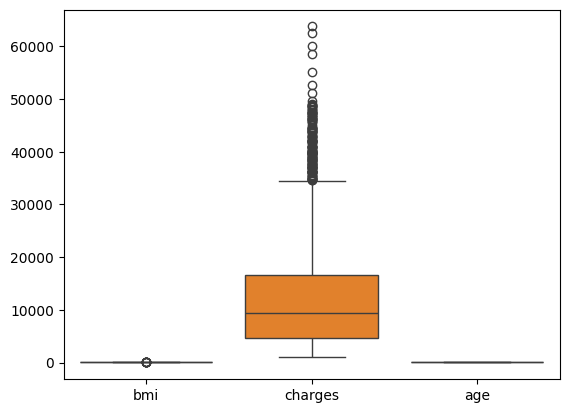

In [190]:
cols=['bmi','charges','age']
sns.boxplot(df[cols])

In [191]:

Q1=df['charges'].quantile(0.25)
Q3=df['charges'].quantile(0.75)

IQR=Q3-Q1
lowwer_fence=Q1-1.5*IQR
upper_fence=Q3+1.5*IQR

df['charges']=np.where((df.charges>=upper_fence) | (df.charges<=lowwer_fence), df['charges'].median(),df['charges'])


In [192]:
x=df.drop('charges',axis=1)
y=df['charges']
x

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [193]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [194]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [195]:
x_train.shape,x_test.shape

((935, 8), (402, 8))

In [196]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [197]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)
y_pred

array([9373.97003917, 9357.79516539, 9365.59950287, 9329.95372171,
       9328.63006573, 9298.01513987, 9298.79321599, 9358.52438779,
       9358.01141045, 9381.80897202, 9355.03368504, 9327.43287089,
       9347.69676636, 9336.30054665, 9294.14763156, 9365.60372011,
       9307.3905692 , 9367.90893127, 9366.87278323, 9360.5597168 ,
       9309.90040528, 9369.66698821, 9337.31133262, 9333.85877042,
       9306.12818159, 9378.74814288, 9331.28873179, 9394.72657916,
       9311.47810753, 9298.13375565, 9347.25895182, 9301.51069867,
       9301.76586458, 9347.62349629, 9292.67236789, 9292.78546898,
       9370.09990759, 9356.76970735, 9329.56589538, 9343.59226848,
       9382.13624149, 9301.71950533, 9341.7385742 , 9382.87225383,
       9369.50014096, 9369.65176989, 9357.12342346, 9319.25357323,
       9347.0253517 , 9356.61511457, 9359.63775906, 9358.24042332,
       9357.70135166, 9341.83056936, 9343.47161324, 9304.1385122 ,
       9299.77376349, 9364.71020046, 9312.88404122, 9374.41147

In [198]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.004615661923575987

In [199]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,0.2,1,2,3,10,50,100],'gamma':[1,0.1,0.2,0.001,0.003],'kernel':['linear'],'epsilon':[0.01,0.1,0.2,0.3]}

grid_seach=GridSearchCV(svr,param_grid=param_grid,cv=5,verbose=3)
grid_seach.fit(x_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.007 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=-0.003 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=-0.011 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=-0.015 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=-0.006 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.007 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=-0.003 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=-0.011 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=-0.015 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.01, gamma=0.1, kernel=linear;, score=-0.006 total time=   0.0s
[CV 1/5] END C=0.1,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 0.2, 1, 2, 3, 10, 50, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [200]:
grid_seach.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [201]:
best_model=grid_seach.best_estimator_
best_model

SVR(C=100, epsilon=0.3, gamma=1, kernel='linear')

In [202]:
y_pred_tuned=best_model.predict(x_test)
y_pred_tuned

array([16114.4816817 , 10983.47131436, 11603.14081393,  6153.49345922,
        6212.41360447,  3775.70337238,  1203.33543918, 12609.84015731,
       11690.25726463, 19526.84531535, 11952.15027804,  7180.11338263,
       10032.80019803,  9653.66476671,   501.32119173, 12297.08583341,
        5095.2157581 , 13665.94222314, 11736.67855333, 13227.4324051 ,
        5149.20490191, 11776.06148236,  8768.86359756,  7817.60593022,
        4657.51064491, 15749.1465524 ,  9009.28231685, 20654.79343718,
        6157.3667491 ,  4507.8075648 ,  9504.29117427,  4507.09810977,
        4570.28179707, 11288.37907725,  1071.58386174,  1400.75569166,
       11754.85030943, 12192.79157554,  5919.15114891,  9265.53100701,
       20316.54680372,  1817.38645505, 10555.58880744, 16711.00668758,
       11300.95140161, 12072.62104284, 11057.03525023,  6672.53319167,
       10293.72720747, 10790.8781443 , 11534.35762036, 11441.56406777,
       10120.84177168,  6300.02019518,  8853.28523574,  2388.1735556 ,
      

In [203]:
r2_score(y_test,y_pred_tuned)

0.4010907497425037